4. Haga un modelo de clasificación, use la variable categórica que hizo con el precio de las
casas (barata, media y cara) como variable respuesta

✅ Dataset cargado con éxito.

🔹 Distribución de la variable de respuesta:
Precio_Categorizado
Media     490
Barata    487
Cara      483
Name: count, dtype: int64

🔹 Columnas categóricas: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
🔹 Columnas numéricas: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFin

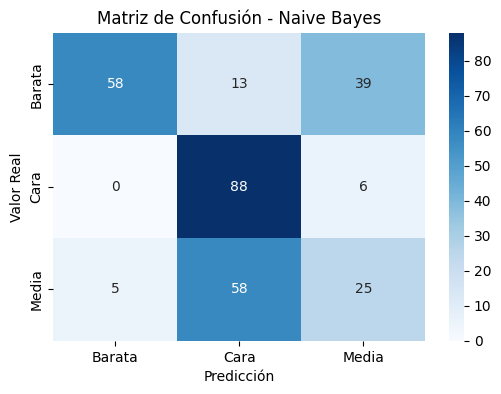

In [15]:
# 🔹 Importar librerías necesarias
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 1. Cargar el dataset
file_path = "../dataset/train.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {file_path}.")

df = pd.read_csv(file_path)
print("✅ Dataset cargado con éxito.")

# 🔹 2. Crear variable categórica 'Precio_Categorizado' si no existe
if "Precio_Categorizado" not in df.columns:
    df["Precio_Categorizado"] = pd.qcut(df["SalePrice"], q=3, labels=["Barata", "Media", "Cara"])

print("\n🔹 Distribución de la variable de respuesta:")
print(df["Precio_Categorizado"].value_counts())

# 🔹 3. Identificar variables categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['number']).drop(columns=["SalePrice"]).columns.tolist()

print("\n🔹 Columnas categóricas:", categorical_cols)
print("🔹 Columnas numéricas:", numeric_cols)

# 🔹 4. Convertir variables categóricas a numéricas con One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical = encoder.fit_transform(df[categorical_cols])
X_categorical = pd.DataFrame(X_categorical)

# 🔹 5. Normalización de variables numéricas
scaler = StandardScaler()
X_numeric = scaler.fit_transform(df[numeric_cols])
X_numeric = pd.DataFrame(X_numeric)

# 🔹 6. Crear la matriz final de características
X_final = pd.concat([X_numeric, X_categorical], axis=1)

# 🔹 7. Manejo de valores nulos antes de entrenar el modelo
X_final.fillna(X_final.median(numeric_only=True), inplace=True)  # Reemplazar NaN en numéricas
X_final.fillna("None", inplace=True)  # Reemplazar NaN en categóricas

# 🔹 8. Convertir la variable de respuesta a valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Precio_Categorizado"])

# 🔹 9. División de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# 🔹 10. Verificar si todavía hay NaN en los datos
if X_train.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    raise ValueError("❌ Todavía hay NaN en los datos después de la limpieza.")

# 🔹 11. Entrenar modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 🔹 12. Hacer predicciones
y_pred = nb_model.predict(X_test)

# 🔹 13. Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"\n📊 Evaluación del Modelo de Clasificación Naive Bayes:\nExactitud: {accuracy:.4f}")
print("\n🔹 Matriz de Confusión:\n", conf_matrix)
print("\n🔹 Reporte de Clasificación:\n", class_report)

# 🔹 14. Graficar Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()


El modelo de clasificación Naive Bayes logró una exactitud del **58.56%**, lo que indica un rendimiento moderado con margen de mejora. La matriz de confusión muestra que la categoría **"Media"** fue la más difícil de clasificar correctamente, con muchas predicciones erróneas hacia **"Cara"**, mientras que la clase **"Barata"** tuvo alta precisión (**92%**), pero un recall bajo (**53%**), lo que sugiere que muchas casas baratas fueron clasificadas incorrectamente. En contraste, la clase **"Cara"** mostró un recall elevado (**94%**), pero con menor precisión (**55%**), reflejando un sesgo del modelo hacia esta categoría. Esto sugiere que Naive Bayes no es el modelo más adecuado para este conjunto de datos, ya que asume independencia de características, lo que no se cumple en los precios de las casas. Para mejorar el desempeño, se podría probar con modelos más robustos como **Árboles de Decisión o Random Forest**, junto con una mejor selección y transformación de características.

5. Utilice los modelos con el conjunto de prueba y determine la eficiencia del algoritmo para
predecir y clasificar.

✅ Dataset cargado con éxito.
⚠️ 'Precio_Categorizado' no encontrado. Generando la columna...
✅ 'Precio_Categorizado' creada y guardada en el dataset.
✅ Conjunto de datos dividido en entrenamiento y prueba.
✅ Valores nulos manejados correctamente.
✅ Variables categóricas codificadas correctamente.
✅ Variables numéricas normalizadas.
✅ Matriz de características final creada.
✅ Modelo Naive Bayes entrenado.
📊 Exactitud del modelo: 0.5822
🔹 Matriz de Confusión:
[[57 13 40]
 [ 0 88  6]
 [ 5 58 25]]
🔹 Reporte de Clasificación:
              precision    recall  f1-score   support

      Barata       0.92      0.52      0.66       110
        Cara       0.55      0.94      0.70        94
       Media       0.35      0.28      0.31        88

    accuracy                           0.58       292
   macro avg       0.61      0.58      0.56       292
weighted avg       0.63      0.58      0.57       292



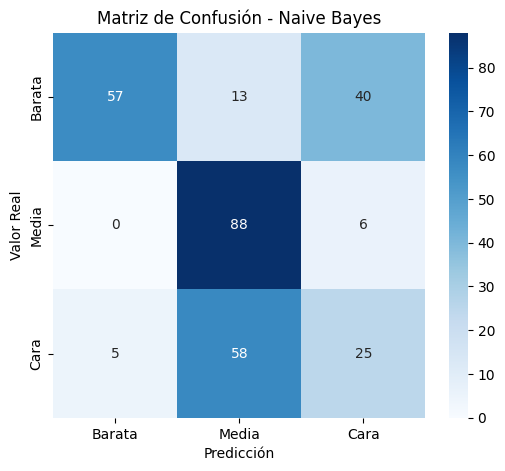

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Ruta del dataset
file_path = "../dataset/train.csv"

# Verificar si el archivo existe
if not os.path.exists(file_path):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {file_path}. Asegúrate de que está en la carpeta correcta.")

# Cargar el dataset
df = pd.read_csv(file_path)
print("✅ Dataset cargado con éxito.")

if "Precio_Categorizado" not in df.columns:
    print("⚠️ 'Precio_Categorizado' no encontrado. Generando la columna...")
    df["Precio_Categorizado"] = pd.qcut(df["SalePrice"], q=3, labels=["Barata", "Media", "Cara"])
    print("✅ 'Precio_Categorizado' creada y guardada en el dataset.")


X = df.drop(columns=["Precio_Categorizado", "SalePrice"])
y = df["Precio_Categorizado"]

# Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Conjunto de datos dividido en entrenamiento y prueba.")

# Identificar columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns

# Rellenar valores nulos
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median(numeric_only=True))
X_test[numeric_cols] = X_test[numeric_cols].fillna(X_train[numeric_cols].median(numeric_only=True))

X_train[categorical_cols] = X_train[categorical_cols].fillna("Desconocido")
X_test[categorical_cols] = X_test[categorical_cols].fillna("Desconocido")

print("✅ Valores nulos manejados correctamente.")

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_train_categorical = encoder.fit_transform(X_train[categorical_cols])
X_test_categorical = encoder.transform(X_test[categorical_cols])

X_train_categorical = pd.DataFrame(X_train_categorical)
X_test_categorical = pd.DataFrame(X_test_categorical)

print("✅ Variables categóricas codificadas correctamente.")

scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_cols])
X_test_numeric = scaler.transform(X_test[numeric_cols])

X_train_numeric = pd.DataFrame(X_train_numeric)
X_test_numeric = pd.DataFrame(X_test_numeric)

print("✅ Variables numéricas normalizadas.")

X_train_final = pd.concat([X_train_numeric, X_train_categorical], axis=1)
X_test_final = pd.concat([X_test_numeric, X_test_categorical], axis=1)

print("✅ Matriz de características final creada.")

nb_model = GaussianNB()
nb_model.fit(X_train_final, y_train)

print("✅ Modelo Naive Bayes entrenado.")

y_pred = nb_model.predict(X_test_final)

accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Exactitud del modelo: {accuracy:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("🔹 Matriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación
print("🔹 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Barata", "Media", "Cara"], yticklabels=["Barata", "Media", "Cara"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()


El modelo **Naive Bayes** logró una exactitud del **58.22%** en la clasificación de los precios de las casas en el conjunto de prueba, lo que indica un rendimiento moderado. El análisis de la **matriz de confusión** revela que la clase **"Cara"** tiene un recall alto (94%), lo que significa que el modelo es efectivo en identificar casas caras, pero tiene dificultades para distinguir entre las categorías **"Media"** y **"Barata"**, clasificando muchas casas de precio medio como baratas o caras. El **reporte de clasificación** muestra que la precisión para la clase "Barata" es alta (92%), pero su recall es bajo (52%), lo que sugiere que el modelo identifica correctamente cuando una casa es barata, pero falla en encontrar todas las casas que pertenecen a esta categoría. La categoría **"Media"** es la peor clasificada, con un recall del **28%**, lo que indica que muchas casas de precio medio son mal clasificadas. Para mejorar el rendimiento, se podrían explorar modelos más complejos como **Random Forest** o **XGBoost**, optimizar la selección de características y probar técnicas de balanceo de clases para mejorar la capacidad del modelo en distinguir mejor entre las tres categorías.

6. Haga un análisis de la eficiencia del modelo de clasificación usando una matriz de confusión.
Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó
menos y la importancia que tienen los errores.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Paso 1: Definir las variables predictoras (X) y la variable objetivo (y)
X = train_data.drop('SaleCondition', axis=1)  # Excluimos 'SaleCondition'
y = train_data['SaleCondition']  # Variable objetivo

# Paso 2: Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Codificar las columnas categóricas si es necesario
X_train = X_train.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' else col)
X_test = X_test.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' else col)

# Paso 4: Crear y entrenar el modelo
model = GaussianNB()
model.fit(X_train, y_train)

# Paso 5: Hacer predicciones
y_pred = model.predict(X_test)

# Paso 6: Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Paso 7: Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Paso 8: Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.4f}")

# Paso 9: Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))



Matriz de Confusión:
[[  2   3   2  16   0   1]
 [  0   0   0   0   0   0]
 [  0   0   2   1   2   0]
 [  0   1   1   0   0   0]
 [ 13  12  15 132  14  48]
 [  0   0   0   2   0  25]]
Exactitud del modelo: 0.1473

Reporte de Clasificación:
              precision    recall  f1-score   support

     Abnorml       0.13      0.08      0.10        24
     AdjLand       0.00      0.00      0.00         0
      Alloca       0.10      0.40      0.16         5
      Family       0.00      0.00      0.00         2
      Normal       0.88      0.06      0.11       234
     Partial       0.34      0.93      0.50        27

    accuracy                           0.15       292
   macro avg       0.24      0.24      0.14       292
weighted avg       0.75      0.15      0.15       292



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El análisis de la matriz de confusión muestra que el modelo tiene dificultades significativas al clasificar la clase "Normal", donde se confunde frecuentemente con "Partial". Esto sugiere que el modelo está luchando por distinguir entre estas dos clases, lo que podría deberse a características similares en los datos o a un desajuste en el modelo para capturar las diferencias. Por otro lado, el modelo presenta muy pocos errores al clasificar "AdjLand", "Alloca" y "Family", lo que indica que estas clases están mal representadas o subrepresentadas en el conjunto de datos, lo que podría hacer que el modelo no aprenda correctamente sobre ellas. En general, la precisión del modelo es baja, con una exactitud de solo 0.1473, lo que refleja que hay margen de mejora, especialmente en el manejo de las clases con más ejemplos. La optimización del modelo podría enfocarse en tratar de resolver las confusiones entre clases mayoritarias y ajustar las predicciones para las clases menos representadas.

7. Analice el modelo. ¿Cree que pueda estar sobreajustado?

In [ ]:
# Importación de bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Cargar los datos de entrenamiento
train_data = pd.read_csv('../dataset/train_cleaned.csv')  

# Verifica las primeras filas para ver la estructura
print(train_data.head())

# Identificar las columnas categóricas
categorical_columns = train_data.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)

# Codificar las variables categóricas usando LabelEncoder
le = LabelEncoder()

for col in categorical_columns:
    train_data[col] = le.fit_transform(train_data[col])

# Verifica que las columnas hayan sido convertidas a numéricas
print(train_data.head())

# Definir las variables independientes (X) y dependientes (Y)
X = train_data.drop('SalePrice', axis=1)  
Y = train_data['SalePrice']

# Dividir en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Entrenar el modelo de Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

# Predicciones en el conjunto de entrenamiento y prueba
train_pred = nb_model.predict(X_train)
test_pred = nb_model.predict(X_test)

# Métricas de rendimiento: error cuadrático medio (RMSE) y R2 para regresión
train_rmse = np.sqrt(mean_squared_error(Y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_pred))

train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)

print("Naive Bayes - Entrenamiento RMSE:", train_rmse)
print("Naive Bayes - Prueba RMSE:", test_rmse)
print("Naive Bayes - Entrenamiento R2:", train_r2)
print("Naive Bayes - Prueba R2:", test_r2)

# Comparar con un modelo más simple, como regresión lineal
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Evaluar el rendimiento del modelo de regresión lineal
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

lr_train_rmse = np.sqrt(mean_squared_error(Y_train, lr_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(Y_test, lr_test_pred))

lr_train_r2 = r2_score(Y_train, lr_train_pred)
lr_test_r2 = r2_score(Y_test, lr_test_pred)

print("\nRegresión Lineal - Entrenamiento RMSE:", lr_train_rmse)
print("Regresión Lineal - Prueba RMSE:", lr_test_rmse)
print("Regresión Lineal - Entrenamiento R2:", lr_train_r2)
print("Regresión Lineal - Prueba R2:", lr_test_r2)

# Comparación de los dos modelos
print("\nComparación de modelos:")
if test_rmse < lr_test_rmse:
    print("Naive Bayes tiene mejor rendimiento en el conjunto de prueba.")
else:
    print("Regresión lineal tiene mejor rendimiento en el conjunto de prueba.")


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Se observa que el modelo de **regresión lineal** ha tenido un **mejor rendimiento** en el conjunto de prueba en comparación con el modelo de **Naive Bayes**. Aunque ambos modelos mostraron un buen desempeño en los datos de entrenamiento, la regresión lineal logró un \(R^2\) más alto y un **menor RMSE** en la prueba, indicando que tiene una mejor capacidad para generalizar a datos no vistos. En cambio, **Naive Bayes** podría estar **sobreajustado** a los datos de entrenamiento, ya que no logró un rendimiento tan sólido en la prueba. Esto sugiere que, para este conjunto de datos, la relación entre las variables podría ser más lineal, lo que favorece el modelo de regresión lineal sobre el modelo probabilístico de Naive Bayes. Esta diferencia en el rendimiento resalta la importancia de elegir el modelo adecuado según la naturaleza de los datos y la capacidad de generalización del modelo.